In [78]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import pylab as pl

In [3]:
cd /Users/Marco/Documents/CSC 478/data/communities

/Users/Marco/Documents/CSC 478/data/communities


In [18]:
df = pd.read_csv("communities.csv")

## 1.a
- Preprocess Data
- Compute and display basic statistics
- Separate the target attribute for regression

In [19]:
df.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [20]:
df = df.drop("state",1)
df = df.drop("communityname",1)
df = df.apply(pd.to_numeric,errors='coerce')
df.dropna(axis=0, inplace=True)
target = df["ViolentCrimesPerPop"]
df = df.drop("ViolentCrimesPerPop",1)

In [21]:
#Converting pandas data frame to array
data = df.values
y  = target.values

In [22]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in data])

## 1.b
- Perform SLR 
- Compute RMSE value on training data
- Plot correlation (predicted vs. actual)
- Display the obtained regression coef
- Perfrom 10-fold cross validation

In [23]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr);yMat = np.mat(yArr).T
    xTx  = xMat.T*xMat
    if np.linalg.det(xTx)==0.0:
        print "This matrix is singular, cannot do the inverse"
        return 
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [24]:
w = standRegres(x,y)

In [26]:
np.set_printoptions(precision=2, linewidth=50, suppress=True, edgeitems=4)

#### Display the regression coefficients:

In [27]:
print w

[[ 0.16]
 [-0.03]
 [ 0.21]
 [-0.04]
 [-0.01]
 [ 0.06]
 [ 0.12]
 [-0.22]
 [-0.14]
 [ 0.06]
 [-0.26]
 [ 0.05]
 [-0.2 ]
 [-0.21]
 [ 0.05]
 [-0.17]
 [ 0.06]
 [ 0.01]
 [-0.09]
 [ 0.27]
 [ 0.1 ]
 [-0.33]
 [-0.03]
 [-0.04]
 [ 0.02]
 [ 0.04]
 [ 0.04]
 [ 0.12]
 [-0.18]
 [-0.09]
 [ 0.06]
 [ 0.11]
 [ 0.  ]
 [ 0.23]
 [-0.04]
 [-0.01]
 [ 0.49]
 [ 0.22]
 [ 0.2 ]
 [-0.61]
 [-0.14]
 [ 0.06]
 [-0.35]
 [-0.04]
 [ 0.  ]
 [ 0.06]
 [-0.18]
 [-0.16]
 [ 0.13]
 [-0.14]
 [ 0.02]
 [ 0.04]
 [-0.08]
 [ 0.03]
 [-0.03]
 [-0.22]
 [ 0.44]
 [-0.19]
 [-0.02]
 [-0.14]
 [ 0.06]
 [-0.21]
 [ 0.65]
 [-0.07]
 [-0.25]
 [-0.67]
 [ 0.2 ]
 [ 0.1 ]
 [ 0.03]
 [ 0.17]
 [-0.04]
 [ 0.56]
 [ 0.05]
 [-0.08]
 [-0.03]
 [ 0.01]
 [-0.01]
 [-0.34]
 [ 0.27]
 [ 0.01]
 [-0.23]
 [-0.04]
 [-0.06]
 [ 0.38]
 [ 0.04]
 [-0.04]
 [-0.08]
 [ 0.13]
 [ 0.18]
 [ 0.12]
 [ 0.01]
 [-0.02]
 [ 0.03]
 [ 0.01]
 [ 0.03]
 [-0.01]
 [-0.04]
 [ 0.57]]


**Now that we have the regression coefficients, we can compute the predictions:**

In [28]:
xMat = np.mat(x)
yMat = np.mat(y)
yHat = xMat*w

The first 10 predictions...

In [30]:
print yHat[0:10]

[[ 0.17]
 [ 0.29]
 [ 0.38]
 [ 0.32]
 [-0.02]
 [ 0.23]
 [ 0.09]
 [ 0.45]
 [ 0.24]
 [ 0.01]]


...compared to the actual values.

In [34]:
print yMat.T[0:10]

[[ 0.2 ]
 [ 0.67]
 [ 0.43]
 [ 0.12]
 [ 0.03]
 [ 0.14]
 [ 0.03]
 [ 0.55]
 [ 0.53]
 [ 0.15]]


In [42]:
err = abs(yHat-yMat.T)

**Training RMSE**

In [48]:
total_error = np.asscalar(np.dot(err.T,err))
rmse_train = np.sqrt(total_error/len(yHat))
print rmse_train

0.128691194406


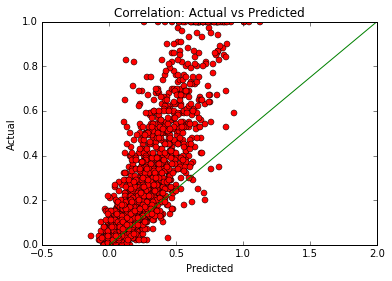

In [186]:
%matplotlib inline
pl.plot(yHat, y,'ro')
pl.plot([0,2],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.title('Correlation: Actual vs Predicted')
pl.show()

In [63]:
linreg = LinearRegression()

**10-fold Cross-Validation using KFold**

In [64]:
kf = KFold(len(x),n_folds=10)
xval_err=0
for train,test in kf:
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p - y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

**Final RMSE**

In [65]:
print rmse_10cv

0.136298055672


In [132]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=33) 

In [187]:
from sklearn import cross_validation,feature_selection
glm = LinearRegression()
glm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 1.c Feature Selection

In [190]:
def find_best_percentile(model,train,target,K=5):
    """The function takes as input the training data, target attribute,K-value, and model and returns 
       the optimal percentage of the most informative features to use. 
    """
    percentiles = range(1, 100, 5)
    results = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(train, target)
        scores = cross_validation.cross_val_score(model, X_train_fs, target,scoring='mean_absolute_error',cv=K)
#         print i,scores.mean()
        results = np.append(results, scores.mean())
    optimal_percentil = np.where(results == results.max())[0]
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("MAE Values")
    pl.title("MAE vs % of features selected")
    pl.plot(percentiles,results)
    return int(optimal_percentil)

Plot of model's MAE values on x-Validation relative to the percentage of selected features

8


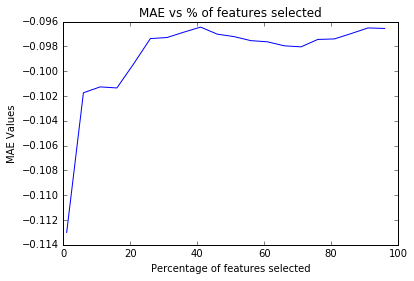

In [191]:
print find_best_percentile(glm,X_train,y_train,10)

In [129]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 8)
X_train_fs = fs.fit_transform(x,y)

**List of the most informative variables and their weights**

In [130]:
for i in range(len(df.columns.values)):
    if fs.get_support()[i]:
        print df.columns.values[i],'\t',fs.scores_[i]

racepctblack 	1330.47773112
racePctWhite 	1766.24094051
pctWInvInc 	991.106863264
PctFam2Par 	1994.73506209
PctKids2Par 	2398.92777975
PctYoungKids2Par 	1596.53025626
PctTeen2Par 	1555.89546616
PctIlleg 	2399.43681052


In [192]:
alpha =np.linspace(.01,20,50)


**Alpha trial for Ridge Regression**

In [205]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1287		 0.1362
0.418	 0.1292		 0.1354
0.826	 0.1295		 0.1354
1.234	 0.1298		 0.1354
1.642	 0.1301		 0.1354
2.050	 0.1303		 0.1354
2.458	 0.1305		 0.1355
2.866	 0.1307		 0.1355
3.274	 0.1309		 0.1356
3.682	 0.1310		 0.1356
4.090	 0.1312		 0.1357
4.498	 0.1313		 0.1357
4.906	 0.1315		 0.1358
5.313	 0.1316		 0.1358
5.721	 0.1317		 0.1359
6.129	 0.1318		 0.1359
6.537	 0.1319		 0.1360
6.945	 0.1320		 0.1360
7.353	 0.1321		 0.1360
7.761	 0.1322		 0.1361
8.169	 0.1323		 0.1361
8.577	 0.1324		 0.1362
8.985	 0.1325		 0.1362
9.393	 0.1326		 0.1362
9.801	 0.1326		 0.1363
10.209	 0.1327		 0.1363
10.617	 0.1328		 0.1363
11.025	 0.1328		 0.1364
11.433	 0.1329		 0.1364
11.841	 0.1330		 0.1364
12.249	 0.1330		 0.1365
12.657	 0.1331		 0.1365
13.065	 0.1332		 0.1365
13.473	 0.1332		 0.1365
13.881	 0.1333		 0.1366
14.289	 0.1333		 0.1366
14.697	 0.1334		 0.1366
15.104	 0.1334		 0.1367
15.512	 0.1335		 0.1367
15.920	 0.1335		 0.1367
16.328	 0.1336		 0

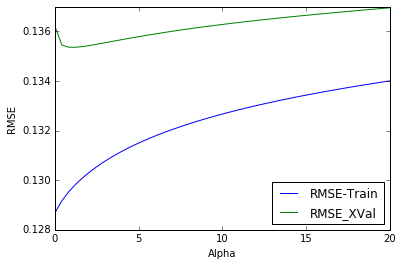

In [206]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal'),loc='lower right' )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

**Alpha trial for lasso regression**

In [207]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    lasso.fit(x,y)
    p = lasso.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf:
        lasso.fit(x[train], y[train])
        p = lasso.predict(x[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1541		 0.1545
0.418	 0.2330		 0.2330
0.826	 0.2330		 0.2330
1.234	 0.2330		 0.2330
1.642	 0.2330		 0.2330
2.050	 0.2330		 0.2330
2.458	 0.2330		 0.2330
2.866	 0.2330		 0.2330
3.274	 0.2330		 0.2330
3.682	 0.2330		 0.2330
4.090	 0.2330		 0.2330
4.498	 0.2330		 0.2330
4.906	 0.2330		 0.2330
5.313	 0.2330		 0.2330
5.721	 0.2330		 0.2330
6.129	 0.2330		 0.2330
6.537	 0.2330		 0.2330
6.945	 0.2330		 0.2330
7.353	 0.2330		 0.2330
7.761	 0.2330		 0.2330
8.169	 0.2330		 0.2330
8.577	 0.2330		 0.2330
8.985	 0.2330		 0.2330
9.393	 0.2330		 0.2330
9.801	 0.2330		 0.2330
10.209	 0.2330		 0.2330
10.617	 0.2330		 0.2330
11.025	 0.2330		 0.2330
11.433	 0.2330		 0.2330
11.841	 0.2330		 0.2330
12.249	 0.2330		 0.2330
12.657	 0.2330		 0.2330
13.065	 0.2330		 0.2330
13.473	 0.2330		 0.2330
13.881	 0.2330		 0.2330
14.289	 0.2330		 0.2330
14.697	 0.2330		 0.2330
15.104	 0.2330		 0.2330
15.512	 0.2330		 0.2330
15.920	 0.2330		 0.2330
16.328	 0.2330		 0

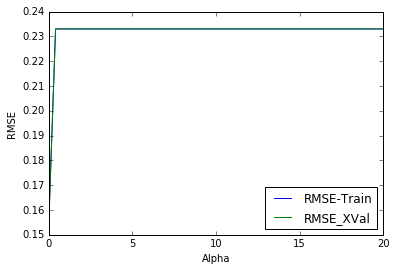

In [209]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal'),loc='lower right' )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

Function that takes in training data, target, a list of values for alpha, the model to be trained and the k value. Prints out a list of training scores for each value of alpha as well as KFold cross-validation scores. 

In [212]:
def alpha_tuning(x,target,alphaList,model="ridge",k=5):
    t_rmse = np.array([])
    cv_rmse = np.array([])
    print('Method: %s' %model)
    print('alpha\t RMSE_train\t RMSE_10cv\n')
    for alpha in alphaList:
        if model == "lasso":
            m = Lasso(fit_intercept=True, alpha=alpha)
        elif model == "ridge": 
            m = Ridge(fit_intercept=True,alpha=alpha)
        m.fit(x,target)
        p = m.predict(x)
        e = p-target
        total_error = np.dot(e,e)
        rmse_train = np.sqrt(total_error/len(p))
        
        kf = KFold(len(x), n_folds=k)
        err = 0
        for train,test in kf:
            m.fit(x[train],target[train])
            p = m.predict(x[test])
            e = p-target[test]
            err += np.dot(e,e)
        
        rmse_10cv = np.sqrt(err/len(x))
        
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_10cv])
        
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(alpha,rmse_train,rmse_10cv))
    pl.plot(alphaList, t_rmse, label='RMSE-Train')
    pl.plot(alphaList, cv_rmse, label='RMSE_XVal')
    pl.legend( ('RMSE-Train', 'RMSE_XVal'),loc='lower right' )
    pl.ylabel('RMSE')
    pl.xlabel('Alpha')
    pl.show()

Method: ridge
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1275		 0.1369
0.418	 0.1282		 0.1358
0.826	 0.1286		 0.1357
1.234	 0.1290		 0.1357
1.642	 0.1293		 0.1358
2.050	 0.1296		 0.1358
2.458	 0.1299		 0.1359
2.866	 0.1301		 0.1359
3.274	 0.1303		 0.1360
3.682	 0.1305		 0.1360
4.090	 0.1307		 0.1361
4.498	 0.1308		 0.1362
4.906	 0.1310		 0.1362
5.313	 0.1311		 0.1362
5.721	 0.1312		 0.1363
6.129	 0.1314		 0.1363
6.537	 0.1315		 0.1364
6.945	 0.1316		 0.1364
7.353	 0.1317		 0.1365
7.761	 0.1318		 0.1365
8.169	 0.1319		 0.1365
8.577	 0.1320		 0.1366
8.985	 0.1321		 0.1366
9.393	 0.1322		 0.1367
9.801	 0.1323		 0.1367
10.209	 0.1323		 0.1367
10.617	 0.1324		 0.1368
11.025	 0.1325		 0.1368
11.433	 0.1326		 0.1368
11.841	 0.1326		 0.1369
12.249	 0.1327		 0.1369
12.657	 0.1328		 0.1369
13.065	 0.1328		 0.1370
13.473	 0.1329		 0.1370
13.881	 0.1330		 0.1370
14.289	 0.1330		 0.1370
14.697	 0.1331		 0.1371
15.104	 0.1331		 0.1371
15.512	 0.1332		 0.1371
15.920	 0.1332		 0.1371
16.328	 0.1333		 0.13

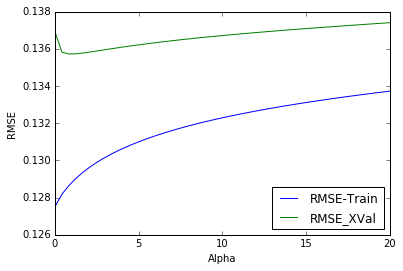

In [213]:
alpha_tuning(X_train,y_train,alpha)

Method: lasso
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1534		 0.1537
0.418	 0.2297		 0.2301
0.826	 0.2297		 0.2301
1.234	 0.2297		 0.2301
1.642	 0.2297		 0.2301
2.050	 0.2297		 0.2301
2.458	 0.2297		 0.2301
2.866	 0.2297		 0.2301
3.274	 0.2297		 0.2301
3.682	 0.2297		 0.2301
4.090	 0.2297		 0.2301
4.498	 0.2297		 0.2301
4.906	 0.2297		 0.2301
5.313	 0.2297		 0.2301
5.721	 0.2297		 0.2301
6.129	 0.2297		 0.2301
6.537	 0.2297		 0.2301
6.945	 0.2297		 0.2301
7.353	 0.2297		 0.2301
7.761	 0.2297		 0.2301
8.169	 0.2297		 0.2301
8.577	 0.2297		 0.2301
8.985	 0.2297		 0.2301
9.393	 0.2297		 0.2301
9.801	 0.2297		 0.2301
10.209	 0.2297		 0.2301
10.617	 0.2297		 0.2301
11.025	 0.2297		 0.2301
11.433	 0.2297		 0.2301
11.841	 0.2297		 0.2301
12.249	 0.2297		 0.2301
12.657	 0.2297		 0.2301
13.065	 0.2297		 0.2301
13.473	 0.2297		 0.2301
13.881	 0.2297		 0.2301
14.289	 0.2297		 0.2301
14.697	 0.2297		 0.2301
15.104	 0.2297		 0.2301
15.512	 0.2297		 0.2301
15.920	 0.2297		 0.2301
16.328	 0.2297		 0.23

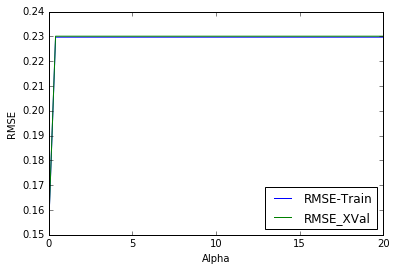

In [214]:
alpha_tuning(X_train,y_train,alpha,"lasso")

#### Summary
The Ridge Regression behaved as expected for both trials, however the lasso regression seems to be giving a weird output. It jumps from RMSE-Train: 0.1534 and RMSE-XVal: 0.1537 with alpha value: 0.10 to levels 0.2297 and 0.2301 respectively, and stays there for all alpha values after that. The documentation says that "... Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the *LinearRegression* object. **For numerical reasons, using alpha = 0 is with the Lasso object is not advised and you should prefer the LinearRegression object."** Tried again (below) with default alpha value, and it seems to be a more appropriate response but without a reference point I can't be sure.

In [217]:
l = Lasso(fit_intercept=True)
l.fit(X_train,y_train)
p = lasso.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

0.232987797871


### 1e. SGD Regressor and GridSearch CV 

In [147]:
from sklearn import preprocessing

Standarizing the features using scaling. 

In [149]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Setting up a param grid to be used in the grid search.

In [156]:
plist = ['l2','l1']
a = alpha.tolist()
paramGrid = dict(penalty=plist,alpha=a)

In [158]:
sgdreg = SGDRegressor()

Passing in a model, the param grid and the CV value to the GridSearchCV constructor

In [160]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(sgdreg,paramGrid,cv=10)

In [162]:
grid.fit(X_train_norm,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1'], 'alpha': [0.01, 0.41795918367346935, 0.8259183673469387, 1.233877551020408, 1.6418367346938774, 2.0497959183673466, 2.457755102040816, 2.865714285714285, 3.2736734693877545, 3.681632653061224, 4.0895918367346935, 4.497551020408163, 4.905510204081632, 5.3134693877...60204081632654, 18.368163265306123, 18.776122448979592, 19.18408163265306, 19.59204081632653, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

**A list of scores for each every different combination value in the param grid**

In [163]:
grid.grid_scores_

[mean: 0.63077, std: 0.04596, params: {'penalty': 'l2', 'alpha': 0.01},
 mean: 0.62729, std: 0.03733, params: {'penalty': 'l1', 'alpha': 0.01},
 mean: 0.62520, std: 0.04105, params: {'penalty': 'l2', 'alpha': 0.41795918367346935},
 mean: -0.00972, std: 0.00992, params: {'penalty': 'l1', 'alpha': 0.41795918367346935},
 mean: 0.61827, std: 0.04026, params: {'penalty': 'l2', 'alpha': 0.8259183673469387},
 mean: -0.01035, std: 0.01102, params: {'penalty': 'l1', 'alpha': 0.8259183673469387},
 mean: 0.59030, std: 0.04124, params: {'penalty': 'l2', 'alpha': 1.233877551020408},
 mean: -0.00822, std: 0.00903, params: {'penalty': 'l1', 'alpha': 1.233877551020408},
 mean: 0.59248, std: 0.05369, params: {'penalty': 'l2', 'alpha': 1.6418367346938774},
 mean: -0.01015, std: 0.01115, params: {'penalty': 'l1', 'alpha': 1.6418367346938774},
 mean: 0.59162, std: 0.04575, params: {'penalty': 'l2', 'alpha': 2.0497959183673466},
 mean: -0.00942, std: 0.01087, params: {'penalty': 'l1', 'alpha': 2.0497959183

**The best scores and params GridSearch found **

In [165]:
print grid.best_score_
print grid.best_params_

0.630768064791
{'penalty': 'l2', 'alpha': 0.01}


**Applygint the model to the test data**

In [167]:
sgd_test = SGDRegressor(penalty='l2',alpha=0.01)

In [168]:
sgd_test.fit(X_test,y_test)

SGDRegressor(alpha=0.01, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [170]:
p = sgd_test.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

In [171]:
print rmse_test

0.145968045095


**Applying model selection to determine the best l1_ratio**

In [183]:
print('SGD Regression')
print('l1_ratio\t RMSE_train\t RMSE_10cv\n')
l1_ratio = np.linspace(0.1,.99,25)
t_rmse = np.array([])
cv_rmse = np.array([])

for l in l1_ratio:
    sgd = SGDRegressor(penalty='elasticnet',l1_ratio=l)
    sgd.fit(X_train,y_train)
    p = sgd.predict(X_train)
    err = p-y_train
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))
    
    kf = KFold(len(X_train), n_folds=10)
    xval_err = 0
    for train, test in kf:
        sgd.fit(X_train[train], y_train[train])
        p = sgd.predict(X_train[test])
        err = p - y_train[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(l,rmse_train,rmse_10cv))

SGD Regression
l1_ratio	 RMSE_train	 RMSE_10cv

0.100	 0.1376		 0.1258
0.137	 0.1386		 0.1250
0.174	 0.1378		 0.1258
0.211	 0.1378		 0.1255
0.248	 0.1385		 0.1251
0.285	 0.1414		 0.1263
0.323	 0.1378		 0.1249
0.360	 0.1388		 0.1258
0.397	 0.1379		 0.1252
0.434	 0.1379		 0.1257
0.471	 0.1377		 0.1259
0.508	 0.1379		 0.1262
0.545	 0.1378		 0.1249
0.582	 0.1379		 0.1251
0.619	 0.1391		 0.1260
0.656	 0.1379		 0.1251
0.693	 0.1381		 0.1252
0.730	 0.1412		 0.1251
0.768	 0.1390		 0.1260
0.805	 0.1379		 0.1252
0.842	 0.1385		 0.1260
0.879	 0.1378		 0.1250
0.916	 0.1402		 0.1257
0.953	 0.1383		 0.1251
0.990	 0.1378		 0.1252


**Applying the best l1_ratio to the test data**

In [193]:
sgd_test2 = SGDRegressor(penalty='elasticnet',l1_ratio=0.323)
sgd_test2.fit(X_test,y_test)
p = sgd_test2.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

In [194]:
print rmse_test

0.14581220883


**Summary**
It would appear that perhaps we should have tried more paramaters with the grid search as simply changing the penalty reveals a slightly better result of: 0.1458(penalty=elasticNet) compared to 0.1459(penalty=l2). It leads you to wonder what other hyperparamater tuning we could do in order to further improve our results.